## Homework5
以下のサイトにあるデータ（ワインの品質）が分析対象です。

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

上記データを読み込み、目的変数のカラム名を`Y_column`、説明変数のカラム名を`X_column`として、これらを関数の入力とする単回帰分析を実施し、**決定係数**を求めてください。ただし、変数の変換やデータ加工等はせず、そのままのデータを使ってください。

提出するときは、以下の点に注意してください。  

>- 以下の関数`homework`の`!!WRITE ME!!`に処理を書いてください。(**「`!!WRITE ME!!`」は消して、記入してください。**)
>- 実際の提出は記述された`homework`関数全てになり、**提出はOmnicampus内の宿題の欄から今週の課題を選択後、提出内容に関数を貼り付けてから[Pythonコード提出]を押してください。**
>- 返り値が数値型(1つ)になるようにしてください。  

例: `X_column = 'volatile acidity'`、`Y_column = 'quality'`のとき、決定係数は$0.1525\cdots$です。

In [1]:
# common
import numpy as np
import pandas as pd
from sklearn import linear_model
# インポート
import requests, zipfile
import io

# URL
path_winequality_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"


In [16]:
'''
res = requests.get(path_winequality_data).content
# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
auto.head()
'''

,0
0,"fixed acidity;""volatile acidity"";""citric acid""..."
1,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
2,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
3,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
4,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...


In [6]:
wine = pd.read_csv(path_winequality_data, sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
print(wine.shape)
print('データ型の確認（型変換前）\n{}\n'.format(wine.dtypes))

(1599, 12)
データ型の確認（型変換前）
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object



In [10]:
wine.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
# 要約統計量をチェック
wine.describe(include = "all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


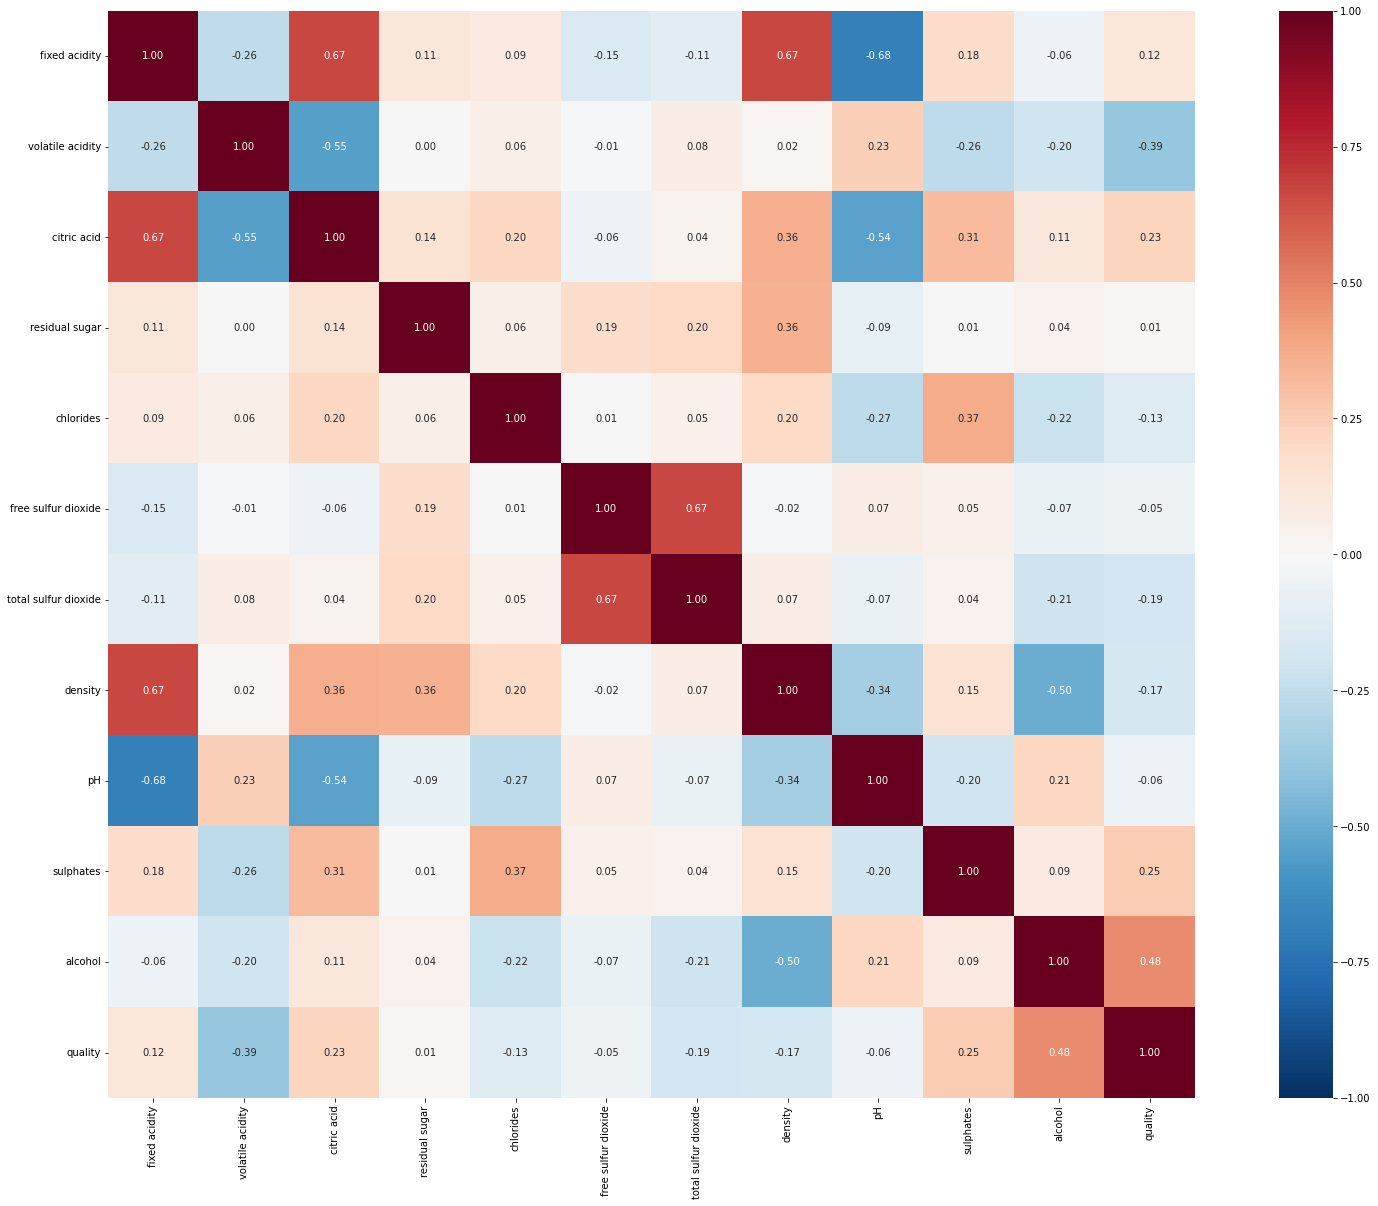

In [11]:
# Base 
# -----------------------------------
import pandas as pd    # data processing
import numpy as np    # linear algebra
import scipy as sp
import matplotlib.pyplot as plt    # 可視化のためのモジュール
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)    # 不要な警告メッセージを出さないようにしています
from IPython.display import Image    # 画像表示のためのモジュール

# 精度評価のためのモジュールをインポート(SKLEARNはMLのためのモジュール)(組み込みデータセット)
# -----------------------------------
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

# Configuration
# -----------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format





corrmat = wine.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, cmap="RdBu_r", annot=True, fmt=".2f", vmax=1, vmin=-1, square=True);

In [22]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

X_column = "fixed acidity"
Y_column = 'citric acid'

# 説明変数のデータを作る
X = wine.loc[:, [X_column]].values

Y = wine[Y_column].values

# 訓練データとテストデータに分ける
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train, Y_train)

# 決定係数を表示
print(model.score(X_test, Y_test))

0.4612641558146907


In [23]:
# working place. everything 
def homework(path_winequality_data, X_column, Y_column):
    wine = pd.read_csv(path_winequality_data, sep=';')
    # データ分割（訓練データとテストデータ）のためのインポート
    from sklearn.model_selection import train_test_split

    # 重回帰のモデル構築のためのインポート
    from sklearn.linear_model import LinearRegression

    # 説明変数のデータを作る
    X = wine.loc[:, [X_column]].values

    Y = wine[Y_column].values

    # 重回帰クラスの初期化と学習
    model = LinearRegression()
    model.fit(X, Y)

    # 決定係数を表示
    my_result = model.score(X, Y)

    return my_result

**謝辞**：以下のデータセットの利用に関して  
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

引用元：Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [[http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml)]. Irvine, CA: University of California, School of Information and Computer Science.

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.